<a href="https://colab.research.google.com/github/nilabja10201992/Cryptocurrency-Price-Prediction/blob/master/comparewithtimesteplargew_l.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9,la;q=0.8,hi;q=0.7,fr;q=0.6" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-datasets/1346/330249/bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1556728085&Signature=XGXS3hu63l4vMnFgnrKdryrBxzOedh6xVvzb2OOevAEcPMUAB7PtYA5VA%2BLQvfZ8KsbH5jAgx2UH3ZB0qf8LueI11aT4NyjHsrW4lcKUVh9ydPdFoz4UukeP%2BNHA5JT0cBx7%2BBcarqyPuICUpdcdlB0PM7Qgcze3Cz0BgfvnXgtMs7kacjbM1l7vGTnTJSxuLBnMSBwugGO7D6Pnd6jQqLr%2BrXmkr2myfKB8n61Y6yzg38KAvMgqiThT7betBTa0k7ect7KcmSlPyu3dYZ4tLfg6DeNpTi9nKn8i%2FazRO6mFj%2BbpMqJdNxwd%2FMGDG86v%2BLAnbfmyGRtEBby4ZsqYmA%3D%3D" -O "bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv.zip" -c

--2019-04-29 04:19:11--  https://storage.googleapis.com/kaggle-datasets/1346/330249/bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1556728085&Signature=XGXS3hu63l4vMnFgnrKdryrBxzOedh6xVvzb2OOevAEcPMUAB7PtYA5VA%2BLQvfZ8KsbH5jAgx2UH3ZB0qf8LueI11aT4NyjHsrW4lcKUVh9ydPdFoz4UukeP%2BNHA5JT0cBx7%2BBcarqyPuICUpdcdlB0PM7Qgcze3Cz0BgfvnXgtMs7kacjbM1l7vGTnTJSxuLBnMSBwugGO7D6Pnd6jQqLr%2BrXmkr2myfKB8n61Y6yzg38KAvMgqiThT7betBTa0k7ect7KcmSlPyu3dYZ4tLfg6DeNpTi9nKn8i%2FazRO6mFj%2BbpMqJdNxwd%2FMGDG86v%2BLAnbfmyGRtEBby4ZsqYmA%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 2a00:1450:4013:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71025792 (68M) [application/zip]
Saving to: ‘bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv.zip’

bitstampUSD_1-min_d 100%[===================>]  

In [2]:
!unzip bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv.zip

Archive:  bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv.zip
  inflating: bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv  


In [3]:
!ls

bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv	 sample_data
bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv.zip


In [0]:
import tensorflow as tf
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import warnings
warnings.filterwarnings(action='ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

# Library for Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, CuDNNLSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
import seaborn as sns
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.rcParams["figure.figsize"] = (20,10)

In [5]:
train_df = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv")
train_df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,3.778817e+06,2.551132e+06,2.551132e+06,2.551132e+06,2.551132e+06,2.551132e+06,2.551132e+06,2.551132e+06
mean,1.438908e+09,2.654668e+03,2.656783e+03,2.652286e+03,2.654650e+03,1.068140e+01,2.395856e+04,2.654510e+03
std,6.561491e+07,3.529553e+03,3.533184e+03,3.525347e+03,3.529522e+03,3.476243e+01,8.829950e+04,3.529271e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.382000e+09,3.489800e+02,3.491500e+02,3.487800e+02,3.489900e+02,4.500000e-01,2.480382e+02,3.489681e+02
50%,1.439071e+09,6.595600e+02,6.600000e+02,6.589900e+02,6.596200e+02,2.095163e+00,1.814312e+03,6.595521e+02
75%,1.495753e+09,4.045492e+03,4.049115e+03,4.042050e+03,4.045400e+03,8.284949e+00,1.303504e+04,4.045115e+03
max,1.552435e+09,1.966576e+04,1.966600e+04,1.964996e+04,1.966575e+04,5.853852e+03,5.483271e+06,1.966330e+04


In [6]:
train_df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
a = train_df[1200000:].fillna(method="backfill")
a.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
1200000,1397317920,423.70,423.70,423.68,423.68,4.000000,1694.754000,423.688500
1200001,1397317980,423.67,423.67,423.67,423.67,0.950200,402.571234,423.670000
1200002,1397318040,423.60,423.60,423.55,423.55,1.517910,642.931121,423.563400
1200003,1397318100,423.55,423.55,423.55,423.55,1.000000,423.550000,423.550000
1200004,1397318160,423.48,423.49,423.48,423.49,1.039435,440.186555,423.486431


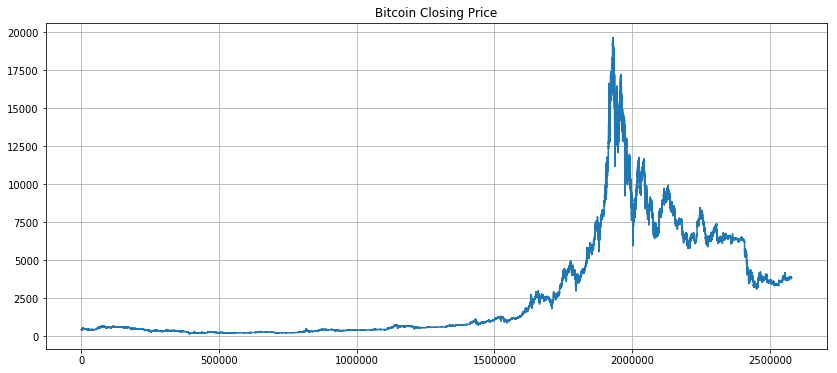

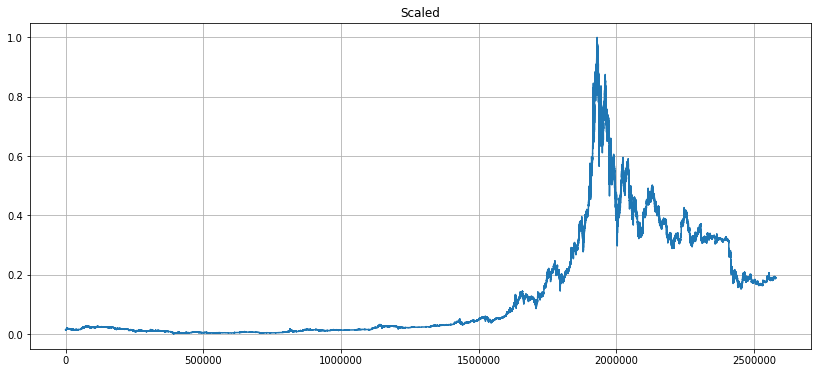

In [8]:
weighted_price = np.array(a.iloc[:,[7]])
plt.figure(figsize=(14,6))
plt.title("Bitcoin Closing Price")
plt.grid()
plt.plot(weighted_price)
sclow = MinMaxScaler()
low_price = np.array(a.iloc[:,[3]])
low_priceSC = sclow.fit_transform(low_price)
sc = MinMaxScaler()
weighted_priceSC = sc.fit_transform(weighted_price)
plt.figure(figsize=(14,6))
plt.title("Scaled")
plt.grid()
plt.plot(weighted_priceSC)

In [0]:
def systematic_mean_absolute_percentage_error(y_true, y_pred):
    n = y_true.shape[0]
    res = 0
    for i in range(n):
        num = np.abs(y_pred[i] - y_true[i])
        dem = (np.abs(y_true[i]) + np.abs(y_pred[i]))/2
        res += num/dem
    res = np.squeeze(res)
    return 100*(res/n)

In [0]:
def mean_absolute_scaled_error(y_true, y_pred):
    n = y_true.shape[0]
    res = 0
    dem = 0
    num = 0
    for i in range(n-1):
        dem += abs(y_true[i+1] - y_true[i])
    for i in range(n):
        num = abs(y_pred[i] - y_true[i])
        num = np.squeeze(num)
        res += num/dem
    res = np.squeeze(res)
    #print(num, dem, res)
    return res/n

In [0]:
def func(timestep, idx):
    timestep = timestep
    X = []
    y = []
    for i in range(timestep, len(weighted_priceSC)):
        X.append(weighted_priceSC[i-timestep:i, :])
        y.append(low_priceSC[i])
    X, y = np.array(X), np.array(y)
    #print(X.shape, y.shape)
    X_train = X[:2500000,:]
    X_test = X[2500000:,:]

    y_train = y[:2500000]
    y_test = y[2500000:]
    %%time
    # The LSTM architecture
    regressor = Sequential()
    # First LSTM layer with Dropout regularisation
    regressor.add(CuDNNLSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
    regressor.add(Dropout(0.2))
    # Second LSTM layer
    regressor.add(CuDNNLSTM(units=50, return_sequences=True))
    regressor.add(Dropout(0.2))
    # Third LSTM layer
    regressor.add(CuDNNLSTM(units=50, return_sequences=True))
    regressor.add(Dropout(0.5))
    # Fourth LSTM layer
    regressor.add(CuDNNLSTM(units=50))
    regressor.add(Dropout(0.5))
    # The output layer
    regressor.add(Dense(units=1))

    # Compiling the RNN
    regressor.compile(optimizer='adam', loss='mean_absolute_error')
    # Fitting to the training set
    regressor.fit(X_train, y_train, epochs=1, batch_size=500)
    #regressor.save('modelw_l'+str(idx)+'.h5')
    #regressor = tf.keras.models.load_model('modelbigw_l'+str(idx)+'.h5')
    y_pred = regressor.predict(X_test)
    return mean_absolute_error(y_test, y_pred), systematic_mean_absolute_percentage_error(y_test, y_pred), mean_absolute_scaled_error(y_test, y_pred), mean_squared_error(y_test, y_pred)

In [22]:
mae_l = []
smape_l = []
mase_l = []
mse_l = []
for i in range(50,201, 50):
    print(i)
    mae, smape, mase, mse = func(i,i)
    mae_l.append(mae)
    smape_l.append(smape)
    mase_l.append(mase)
    mse_l.append(mse)

50
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.44 µs
Epoch 1/1
2500000/2500000 [==============================] - 127s 51us/step - loss: 0.0149
100
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs
Epoch 1/1
2500000/2500000 [==============================] - 225s 90us/step - loss: 0.0149
150
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
Epoch 1/1
2500000/2500000 [==============================] - 331s 132us/step - loss: 0.0149
200
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.58 µs
Epoch 1/1
2500000/2500000 [==============================] - 436s 174us/step - loss: 0.0149


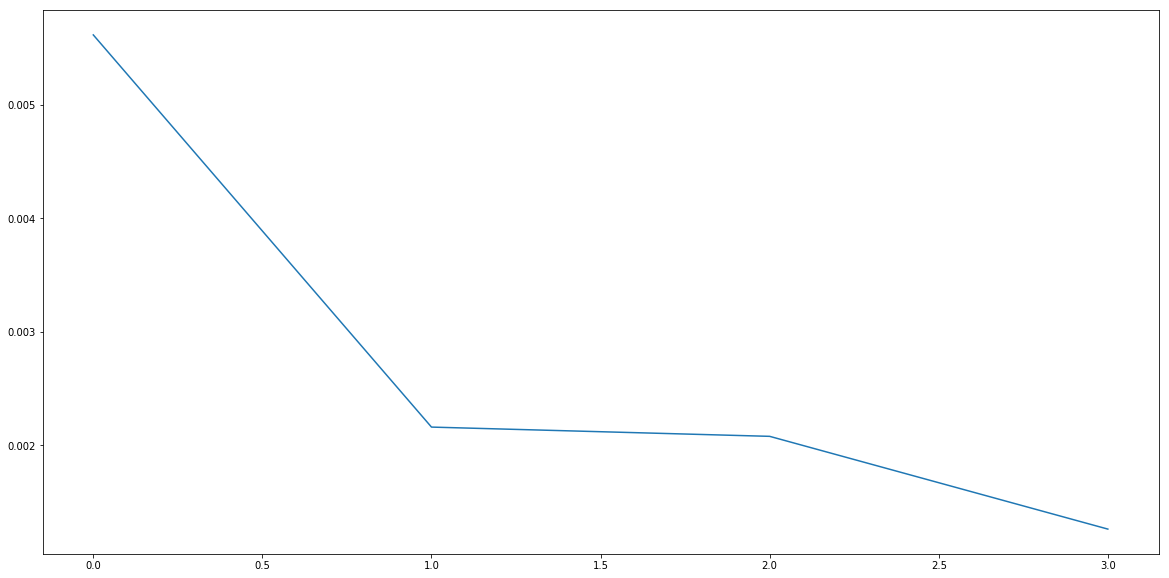

In [23]:
plt.plot(mae_l)

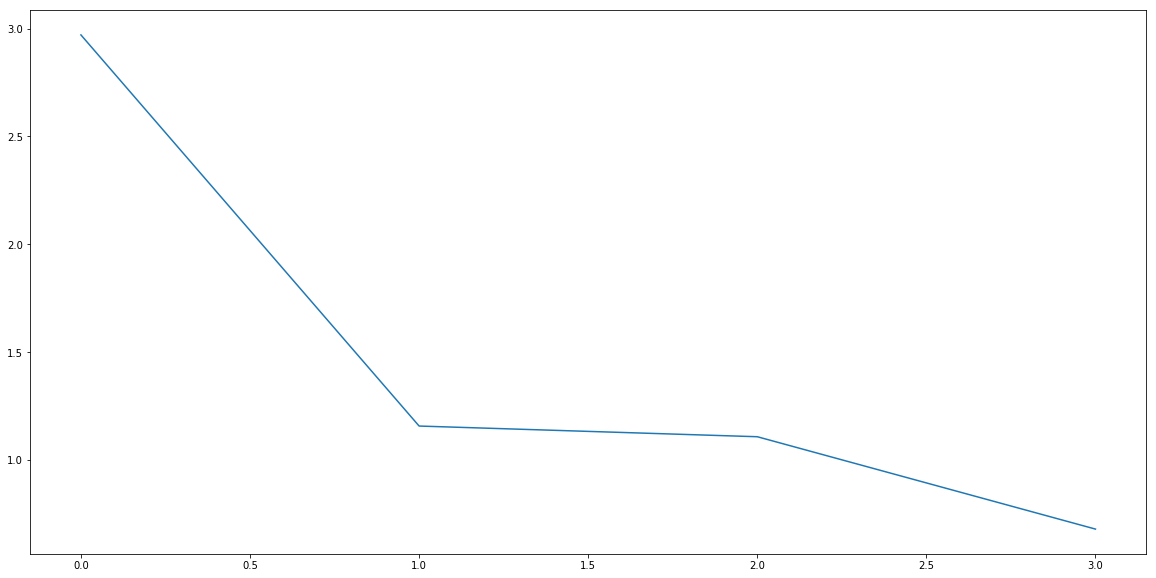

In [24]:
plt.plot(smape_l)

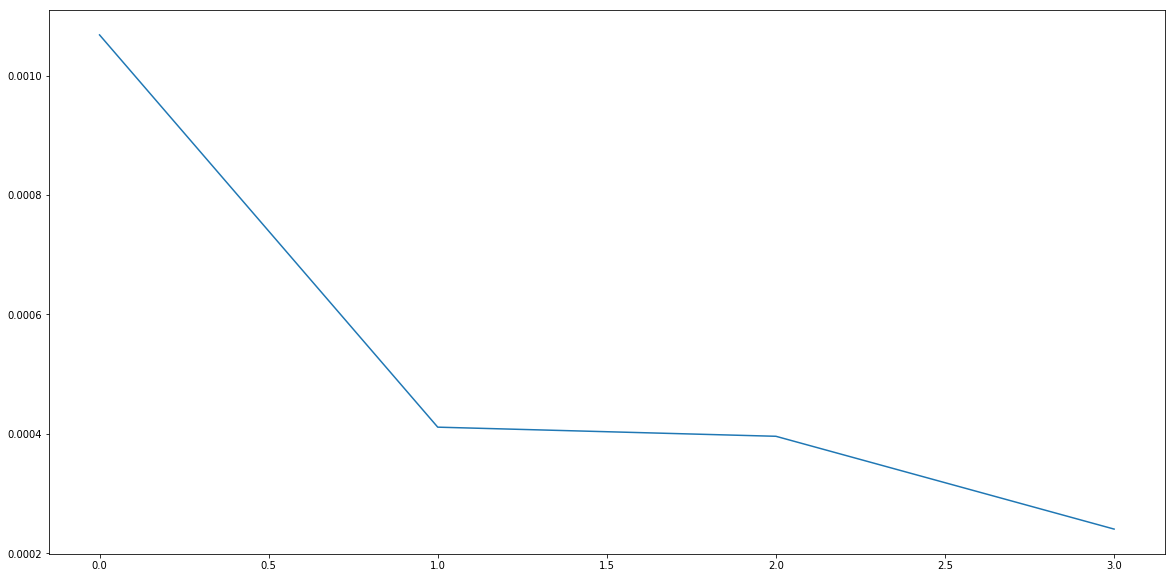

In [25]:
plt.plot(mase_l)

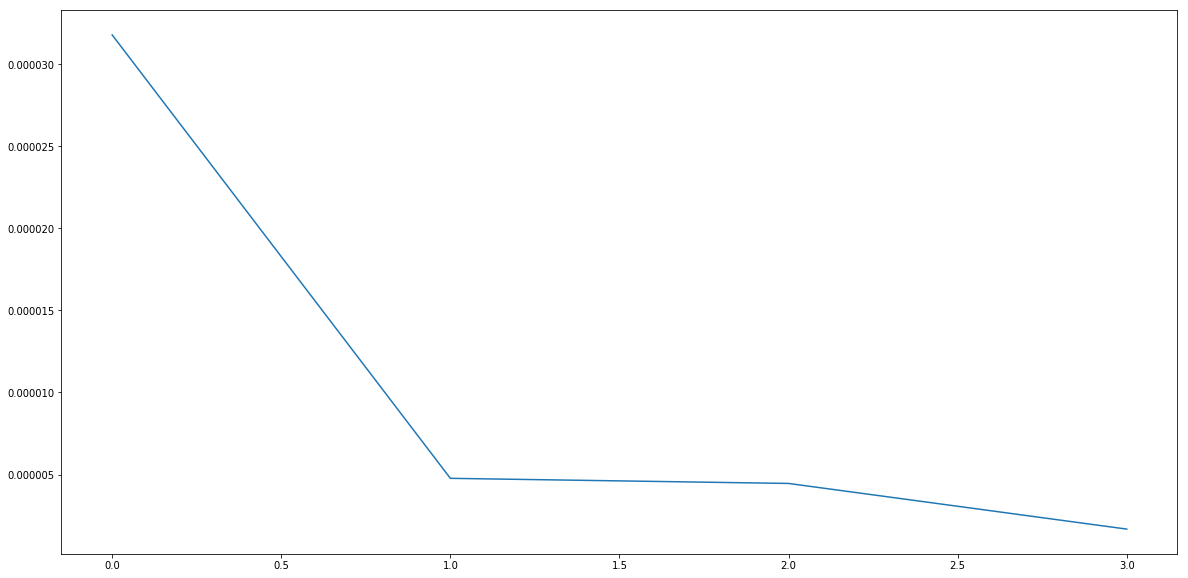

In [26]:
plt.plot(mse_l)

In [28]:
print("Units = 50 in each hidden layer:\nMean absolute error {0}\nSystematic mean absolute percentage error {1} \nMean_absolute_scaled_error {2}\nMean square error {3}".format(mae_l[0],smape_l[0], mase_l[0], mse_l[0]))

Units = 50 in each hidden layer:
Mean absolute error 0.00561585904002963
Systematic mean absolute percentage error 2.970939104294934 
Mean_absolute_scaled_error 0.0010682088354152998
Mean square error 3.17826654227592e-05


In [29]:
print("Units = 100 in each hidden layer:\nMean absolute error {0}\nSystematic mean absolute percentage error {1} \nMean_absolute_scaled_error {2}\nMean square error {3}".format(mae_l[1],smape_l[1], mase_l[1], mse_l[1]))

Units = 100 in each hidden layer:
Mean absolute error 0.0021591289693029276
Systematic mean absolute percentage error 1.1573948723467946 
Mean_absolute_scaled_error 0.00041092614603073003
Mean square error 4.766737772974536e-06


In [30]:
print("Units = 150 in each hidden layer:\nMean absolute error {0}\nSystematic mean absolute percentage error {1} \nMean_absolute_scaled_error {2}\nMean square error {3}".format(mae_l[2],smape_l[2], mase_l[2], mse_l[2]))

Units = 150 in each hidden layer:
Mean absolute error 0.002077593246534409
Systematic mean absolute percentage error 1.1078433574055144 
Mean_absolute_scaled_error 0.0003956337276518276
Mean square error 4.455283734499833e-06


In [31]:
print("Units = 200 in each hidden layer:\nMean absolute error {0}\nSystematic mean absolute percentage error {1} \nMean_absolute_scaled_error {2}\nMean square error {3}".format(mae_l[3],smape_l[3], mase_l[3], mse_l[3]))

Units = 200 in each hidden layer:
Mean absolute error 0.0012600961031271694
Systematic mean absolute percentage error 0.6795956413784451 
Mean_absolute_scaled_error 0.00024012509418182369
Mean square error 1.6742141335698947e-06
